# Setup

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv("articles_2017-12-01_2017-12-31.csv", index_col="id", \
                   parse_dates=["published", "discovered"])
data.head()

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,publisher_name,publisher_id,mins_as_lead,mins_on_front,num_articles_on_front,fb_brand_page,fb_brand_page_likes,fb_brand_page_time,alexa_rank,word_count
id,,,,,,,,,,,,,,,,,,,,
ddd1ccb2bc026b5b44204e5f4f08de1d75d4280a,https://www.thetimes.co.uk/article/winter-sun-...,Winter sun: 12 of the best holiday destinations,2017-12-04 00:04:58.520,2017-12-01,2,0.000000,2017-12-04T00:16:03.826Z,0,1,1,The Times,thetimes_co_uk,0,1435,237.0,False,NaN,NaN,6435,126.0
d8409c3f40ce732ab4917e88f3991fba6e34052c,https://www.thetimes.co.uk/article/news-in-pic...,News in pictures,2017-12-01 03:24:07.825,2017-12-01,246,1.150685,2017-12-01T18:50:03.239Z,26,216,4,The Times,thetimes_co_uk,0,1235,293.0,False,NaN,NaN,6435,NaN
8ec1e46d261cde4b7eb7818481e02a439a344966,https://www.thetimes.co.uk/article/the-best-ch...,The best Christmas photos from around the UK,2017-12-02 00:04:48.863,2017-12-01,0,0.000000,2017-12-02T00:16:18.566Z,0,0,0,The Times,thetimes_co_uk,0,1434,328.0,False,NaN,NaN,6435,NaN
a0b6c78af7ce197a41eb7f2e8514929e40cf0f01,https://www.thetimes.co.uk/article/nationalist...,Inés Arrimadas: Nationalist’s wife leads call ...,2017-12-01 07:39:11.810,2017-12-01,0,0.000000,2017-12-01T07:50:11.497Z,0,0,0,The Times,thetimes_co_uk,0,565,294.0,False,NaN,NaN,6435,125.0
d6b3d8608c147417d6f83042303ad18d48df5069,https://www.thetimes.co.uk/article/winners-of-...,Winners of the mini-reshuffle,2017-12-01 00:08:35.154,2017-12-01,1,0.016389,2017-12-01T10:30:08.613Z,0,0,1,The Times,thetimes_co_uk,0,1435,291.0,False,NaN,NaN,6435,125.0


# Response Score

The response score is a number between 0 and 50 that indicates the level of response to an article.



Perhaps in the future we may choose to include other factors, but for now we just include engagements on Facebook. The maximum score of 50 should be achieved by an article that does really well compared with others.

In [4]:
pd.options.display.float_format = '{:.2f}'.format
data.fb_engagements.describe([0.5, 0.75, 0.9, 0.95, 0.99, 0.995, 0.999])

count    139145.00
mean       1105.88
std        9852.92
min           0.00
50%          24.00
75%         243.00
90%        1545.00
95%        4086.00
99%       20228.36
99.5%     32446.04
99.9%     87128.53
max     1741886.00
Name: fb_engagements, dtype: float64

There's 3 articles with more than 1 million engagements this month.

In [5]:
data[data.fb_engagements > 1000000]

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,publisher_name,publisher_id,mins_as_lead,mins_on_front,num_articles_on_front,fb_brand_page,fb_brand_page_likes,fb_brand_page_time,alexa_rank,word_count
id,,,,,,,,,,,,,,,,,,,,
5c2b2bee6d23ef061ff65a0adcd0fb2e1d5374bf,http://www.dailymail.co.uk/health/article-2054...,Bad news for dads: Babies 'should share mother...,2017-12-08 16:18:25.150,2017-12-07 21:00:00,1502932,284.84,2017-12-09T04:07:10.793Z,573487,672710,256735,Daily Mail,dailymail_co_uk,0,0,nan,True,13574153.00,2017-12-08T16:15:11.000Z,158,494.00
5bf276f7b22af522d1a15b94ad40f1b3858d3e61,https://www.nytimes.com/2017/12/12/us/politics...,"Once a Long Shot, Democrat Doug Jones Wins Ala...",2017-12-13 03:28:08.107,2017-12-13 03:25:52,1054926,8809.66,2017-12-13T04:12:18.429Z,86607,906432,61887,New York Times,nytimes_com,840,1319,120.00,True,15020753.00,2017-12-13T03:28:45.000Z,120,1454.00
823cc4c44f81ebb54e4adef2e98c20f95480055f,https://www.washingtonpost.com/national/health...,"CDC gets list of forbidden words: fetus, trans...",2017-12-16 00:08:50.251,2017-12-15 23:53:00,1741886,1850.97,2017-12-16T02:04:09.495Z,457275,1017806,266805,The Washington Post,washingtonpost_com,0,3749,89.00,True,6099192.00,2017-12-16T00:27:14.000Z,191,766.00


In [6]:
data.fb_engagements.mode()

0    0
dtype: int64

*last month* Going back to the enagement counts, we see the mean is 1,117, mode is zero, median is 24, 90th percentile is 1,453, 99th percentile is 21,166, 99.5th percentile is 33,982. The standard deviation is 8,083, significantly higher than the mean, so this is not a normal distribution. 

Going back to the enagement counts, we see the mean is 1,106, mode is zero, median is 24, 90th percentile is 1,545, 99th percentile is 20,228, 99.5th percentile is 32,446. The standard deviation is 9,852, significantly higher than the mean, so this is not a normal distribution. 

Key publishers stats

In [7]:
data.groupby("publisher_id").agg({'url': 'count', 'fb_engagements': ['sum', 'median', 'mean']})

url fb_engagements                
                                  count            sum  median    mean
publisher_id                                                          
anotherangryvoice_blogspot_co_uk     20          40120 1809.00 2006.00
bbc_co_uk                         10821        7646802   28.00  706.66
breitbart_com                      2640       11722200  270.50 4440.23
brexitcentral_com                    45          24409  188.00  542.42
buzzfeed_com                       1182        2772469  165.00 2345.57
cnn_com                            3085       14990814  638.00 4859.26
dailymail_co_uk                   22066       15935337   29.00  722.17
economist_com                       340          90374   32.00  265.81
evolvepolitics_com                   39         274563 1592.00 7040.08
foxnews_com                        5043       15670336   72.00 3107.34
ft_com                             3870         268372    5.00   69.35
huffingtonpost_com                 8947       10716052    9.00 1197.73
independent_co_uk                  5718        4911814   31.00  859.01
indy100_com                         500         290099   52.00  580.20
lemonde_fr                         3644        2019719   82.50  554.26
libdemvoice_org                     142           1988    8.00   14.00
mirror_co_uk                       9514        6559353   54.50  689.44
nbcnews_com                        1793        5202028  446.00 2901.30
newstatesman_com                    362          61350   23.00  169.48
npr_org                            1878        7021350  239.50 3738.74
nytimes_com                        4541       17519582  215.00 3858.09
order-order_com                     170          55692  162.50  327.60
propublica_org                       55          71414  529.00 1298.44
reuters_com                        5213        1842218   20.00  353.39
rt_com                             2572        2600470  264.00 1011.07
skwawkbox_org                       102          68492  263.50  671.49
telegraph_co_uk                    6285        2283897   18.00  363.39
thecanary_co                        184         220508  609.00 1198.41
theguardian_com                    7662        9020836  122.00 1177.35
thetimes_co_uk                     8869         338754    1.00   38.20
washingtonpost_com                21217       12472172    0.00  587.84
westmonster_com                     274         371790   51.50 1356.90
yournewswire_com                    352         792901  165.50 2252.56

In [8]:
mean = data.fb_engagements.mean()
median = data.fb_engagements.median()

non_zero_fb_enagagements = data.fb_engagements[data.fb_engagements > 0]

That's a bit better, but still way too clustered at the low end. Let's look at a log normal distribution.

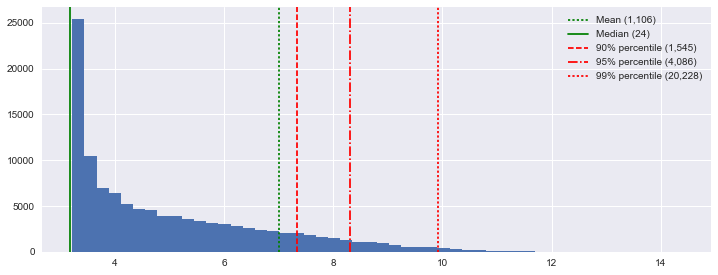

In [9]:
mean = data.fb_engagements.mean()
median = data.fb_engagements.median()
ninety = data.fb_engagements.quantile(.90)
ninetyfive = data.fb_engagements.quantile(.95)
ninetynine = data.fb_engagements.quantile(.99)

plt.figure(figsize=(12,4.5))
plt.hist(np.log(non_zero_fb_enagagements + median), bins=50)
plt.axvline(np.log(mean), linestyle=':', label=f'Mean ({mean:,.0f})', color='green')
plt.axvline(np.log(median), label=f'Median ({median:,.0f})', color='green')
plt.axvline(np.log(ninety), linestyle='--', label=f'90% percentile ({ninety:,.0f})', color='red')
plt.axvline(np.log(ninetyfive), linestyle='-.', label=f'95% percentile ({ninetyfive:,.0f})', color='red')
plt.axvline(np.log(ninetynine), linestyle=':', label=f'99% percentile ({ninetynine:,.0f})', color='red')
leg = plt.legend()


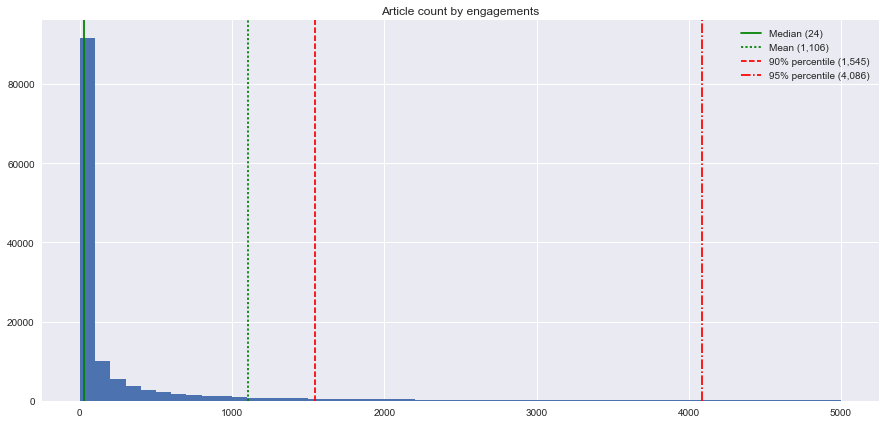

In [10]:
eng = data.fb_engagements[(data.fb_engagements < 5000)]
mean = data.fb_engagements.mean()
median = data.fb_engagements.median()
ninety = data.fb_engagements.quantile(.90)
ninetyfive = data.fb_engagements.quantile(.95)
ninetynine = data.fb_engagements.quantile(.99)

plt.figure(figsize=(15,7))
plt.hist(eng, bins=50)
plt.title("Article count by engagements")
plt.axvline(median, label=f'Median ({median:,.0f})', color='green')
plt.axvline(mean, linestyle=':', label=f'Mean ({mean:,.0f})', color='green')
plt.axvline(ninety, linestyle='--', label=f'90% percentile ({ninety:,.0f})', color='red')
plt.axvline(ninetyfive, linestyle='-.', label=f'95% percentile ({ninetyfive:,.0f})', color='red')
# plt.axvline(ninetynine, linestyle=':', label=f'99% percentile ({ninetynine:,.0f})', color='red')
leg = plt.legend()


In [11]:
log_engagements = (non_zero_fb_enagagements
                   .clip_upper(data.fb_engagements.quantile(.999))
                   .apply(lambda x: np.log(x + median))
                  )
log_engagements.describe()

count   112066.00
mean         4.99
std          1.77
min          3.22
25%          3.50
50%          4.41
75%          6.06
max         11.38
Name: fb_engagements, dtype: float64

Use standard feature scaling to bring that to a 1 to 50 range


In [12]:
def scale_log_engagements(engagements_logged):
    return np.ceil(
        50 * (engagements_logged - log_engagements.min()) / (log_engagements.max() - log_engagements.min())
    )

def scale_engagements(engagements):
    return scale_log_engagements(np.log(engagements + median))

scaled_non_zero_engagements = scale_log_engagements(log_engagements)
scaled_non_zero_engagements.describe()

count   112066.00
mean        11.33
std         10.89
min          0.00
25%          2.00
50%          8.00
75%         18.00
max         50.00
Name: fb_engagements, dtype: float64

In [13]:
# add in the zeros, as zero
scaled_engagements = pd.concat([scaled_non_zero_engagements, data.fb_engagements[data.fb_engagements == 0]])

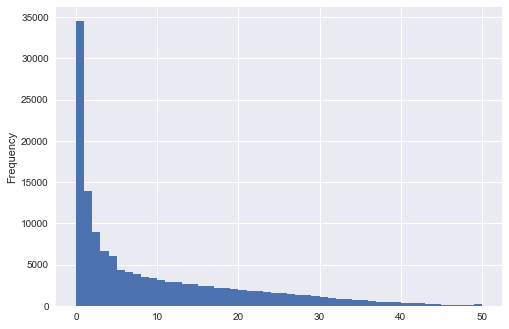

In [14]:
proposed = pd.DataFrame({"fb_engagements": data.fb_engagements, "response_score": scaled_engagements})
proposed.response_score.plot.hist(bins=50)

Looks good to me, lets save that.

In [15]:
data["response_score"] = proposed.response_score

### Proposal

The maximum of 50 points is awarded when the engagements are greater than the 99.9th percentile, rolling over the last month. 

i.e. where $limit$ is the 99.5th percentile of engagements calculated over the previous month, the response score for article $a$ is:

\begin{align}
basicScore_a & = 
\begin{cases} 
   0 & \text{if } engagements_a = 0 \\
   \log(\min(engagements_a,limit) + median(engagements))      & \text{if } engagements_a > 0
\end{cases} \\
responseScore_a & = 
\begin{cases} 
   0 & \text{if } engagements_a = 0 \\
   50 \cdot \frac{basicScore_a - \min(basicScore)}{\max(basicScore) - \min(basicScore)}       & \text{if } engagements_a > 0
\end{cases} \\
\\
\text{The latter equation can be expanded to:} \\
responseScore_a & = 
\begin{cases} 
   0 & \text{if } engagements_a = 0 \\
   50 \cdot 
   \frac{\log(\min(engagements_a,limit) + median(engagements)) - \log(1 + median(engagements))}
   {\log(limit + median(engagements)) - \log(1 + median(engagements))}       & \text{if } engagements_a > 0
\end{cases} \\
\end{align}

# Promotion Score

The aim of the promotion score is to indicate how important the article was to the publisher, by tracking where they chose to promote it. This is a number between 0 and 50 comprised of:

- 20 points based on whether the article was promoted as the "lead" story on the publisher's home page
- 15 points based on how long the article was promoted anywhere on the publisher's home page
- 15 points based on whether the article was promoted on the publisher's main facebook brand page

The first two should be scaled by the popularity/reach of the home page, for which we use the alexa page rank as a proxy.

The last should be scaled by the popularity/reach of the brand page, for which we use the number of likes the brand page has.

### Lead story (20 points)

In [16]:
data.mins_as_lead.describe([0.5, 0.75, 0.9, 0.95, 0.99, 0.995, 0.999])

count   139145.00
mean        10.25
std        107.35
min          0.00
50%          0.00
75%          0.00
90%          0.00
95%          0.00
99%        305.00
99.5%      594.00
99.9%     1359.00
max      13930.00
Name: mins_as_lead, dtype: float64

As expected, the vast majority of articles don't make it as lead. Let's explore how long typically publishers put something as lead for.

In [17]:
lead_articles = data[data.mins_as_lead > 0]

In [18]:
lead_articles.mins_as_lead.describe([0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.995, 0.999])

count    4013.00
mean      355.24
std       526.37
min         4.00
25%        94.00
50%       190.00
75%       425.00
90%       888.20
95%      1160.60
99%      1890.20
99.5%    2723.16
99.9%    5808.77
max     13930.00
Name: mins_as_lead, dtype: float64

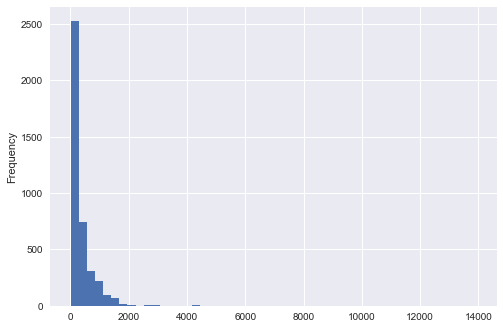

In [19]:
lead_articles.mins_as_lead.plot.hist(bins=50)

For lead, it's a  significant thing for an article to be lead at all, so although we want to penalise articles that were lead for a very short time, mostly we want to score the maximum even if it wasn't lead for ages. So we'll give maximum points when something has been lead for an hour.

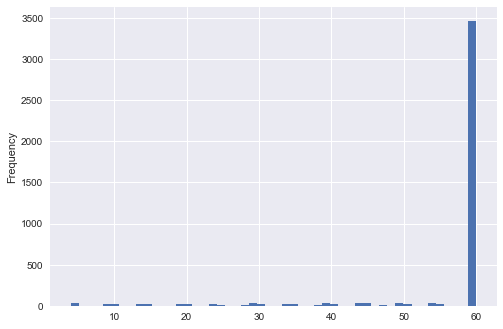

In [20]:
lead_articles.mins_as_lead.clip_upper(60).plot.hist(bins=50)

We also want to scale this by the alexa page rank, such that the maximum score of 20 points is for an article that was on the front for 4 hours for the most popular site.

So lets explore the alexa nunbers.

In [21]:
alexa_ranks = data.groupby(by="publisher_id").alexa_rank.mean().sort_values()
alexa_ranks

publisher_id
bbc_co_uk                               96
cnn_com                                105
nytimes_com                            120
theguardian_com                        142
buzzfeed_com                           147
dailymail_co_uk                        158
washingtonpost_com                     191
huffingtonpost_com                     215
foxnews_com                            285
rt_com                                 365
telegraph_co_uk                        370
independent_co_uk                      386
reuters_com                            497
npr_org                                594
lemonde_fr                             618
mirror_co_uk                           706
nbcnews_com                            826
breitbart_com                          994
ft_com                                1596
economist_com                         1825
indy100_com                           5014
thetimes_co_uk                        6435
newstatesman_com                     1276

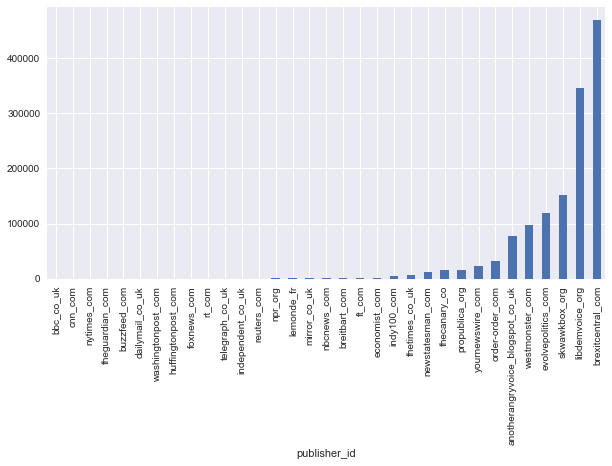

In [22]:
alexa_ranks.plot.bar(figsize=[10,5])

Let's try the simple option first: just divide the number of minutes as lead by the alexa rank. What's the scale of numbers we get then.

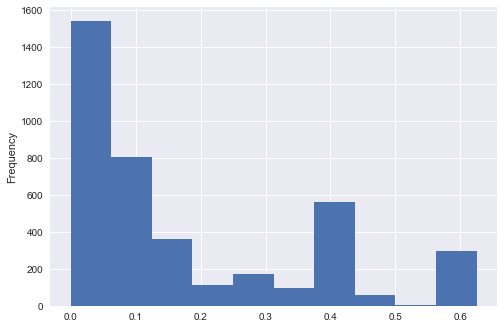

In [23]:
lead_proposal_1 = lead_articles.mins_as_lead.clip_upper(60) / lead_articles.alexa_rank
lead_proposal_1.plot.hist()

Looks like there's too much of a cluster around 0. Have we massively over penalised the publishers with a high alexa rank?

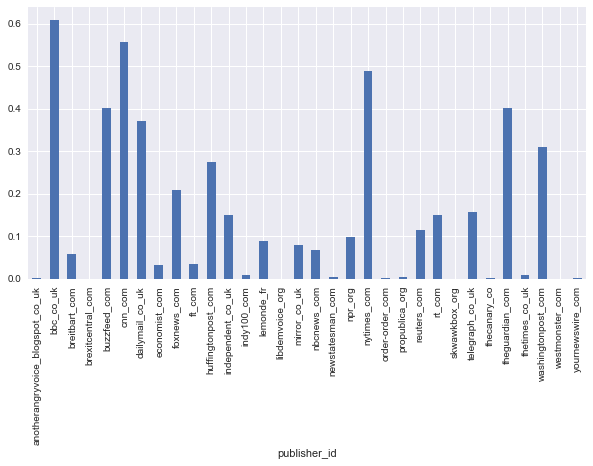

In [24]:
lead_proposal_1.groupby(data.publisher_id).mean().plot.bar(figsize=[10,5])

Yes. Let's try taking the log of the alexa rank and see if that looks better.

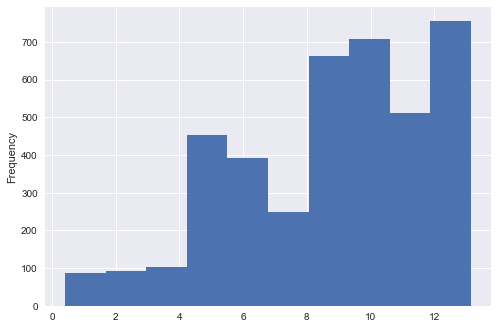

In [25]:
lead_proposal_2 = (lead_articles.mins_as_lead.clip_upper(60) / np.log(lead_articles.alexa_rank))
lead_proposal_2.plot.hist()

In [26]:
lead_proposal_2.groupby(data.publisher_id).describe()

,count,mean,std,min,25%,50%,75%,max
publisher_id,,,,,,,,
anotherangryvoice_blogspot_co_uk,20.00,5.31,0.10,4.88,5.33,5.33,5.33,5.33
bbc_co_uk,106.00,12.80,1.80,1.97,13.15,13.15,13.15,13.15
breitbart_com,197.00,8.43,1.19,0.72,8.69,8.69,8.69,8.69
brexitcentral_com,39.00,4.45,0.57,1.91,4.59,4.59,4.59,4.59
buzzfeed_com,275.00,11.80,1.16,1.80,12.02,12.02,12.02,12.02
cnn_com,209.00,12.57,1.37,2.15,12.89,12.89,12.89,12.89
dailymail_co_uk,171.00,11.57,1.22,1.98,11.85,11.85,11.85,11.85
economist_com,37.00,7.66,1.44,0.53,7.99,7.99,7.99,7.99
foxnews_com,105.00,10.55,0.62,4.25,10.61,10.61,10.61,10.61


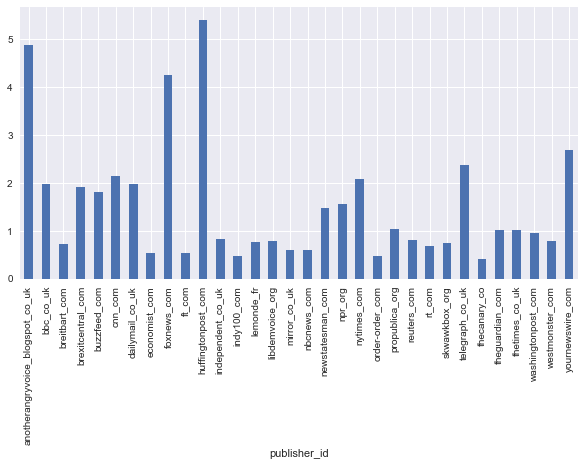

In [27]:
lead_proposal_2.groupby(data.publisher_id).min().plot.bar(figsize=[10,5])

That looks about right, as long as the smaller publishers were closer to zero. So let's apply feature scaling to this, to give a number between 1 and 20. (Anything not as lead will pass though as zero.)

In [28]:
def rescale(series):
    return (series - series.min()) / (series.max() - series.min())

lead_proposal_3 = np.ceil(20 * rescale(lead_proposal_2))

In [29]:
lead_proposal_2.min(), lead_proposal_2.max()

(0.41405622016623894, 13.145359968846892)

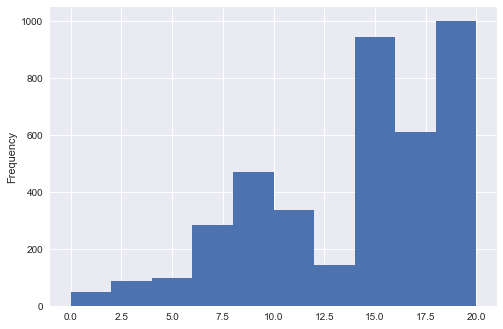

In [30]:
lead_proposal_3.plot.hist()

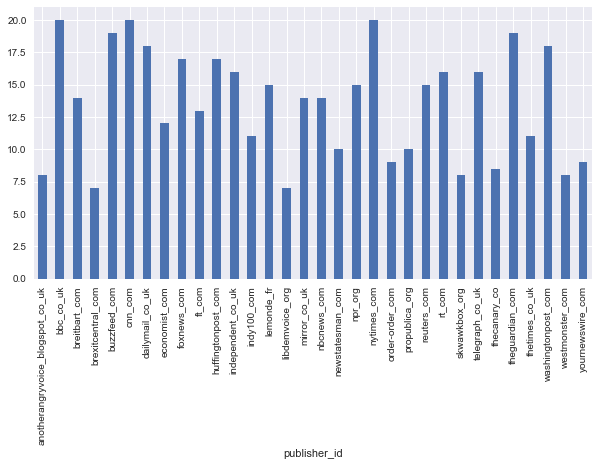

In [31]:
lead_proposal_3.groupby(data.publisher_id).median().plot.bar(figsize=[10,5])

In [32]:
data["lead_score"] = pd.concat([lead_proposal_3, data.mins_as_lead[data.mins_as_lead==0]])

In [33]:
data.lead_score.value_counts().sort_index()

0.00     135133
1.00         46
2.00         40
3.00         47
4.00         45
5.00         51
6.00         53
7.00        230
8.00        224
9.00        245
10.00       146
11.00       189
12.00        61
13.00        81
14.00       581
15.00       363
16.00       345
17.00       266
18.00       244
19.00       402
20.00       353
Name: lead_score, dtype: int64

In [34]:
data.lead_score.groupby(data.publisher_id).max()

publisher_id
anotherangryvoice_blogspot_co_uk    8.00
bbc_co_uk                          20.00
breitbart_com                      14.00
brexitcentral_com                   7.00
buzzfeed_com                       19.00
cnn_com                            20.00
dailymail_co_uk                    18.00
economist_com                      12.00
evolvepolitics_com                  0.00
foxnews_com                        17.00
ft_com                             13.00
huffingtonpost_com                 17.00
independent_co_uk                  16.00
indy100_com                        11.00
lemonde_fr                         15.00
libdemvoice_org                     7.00
mirror_co_uk                       14.00
nbcnews_com                        14.00
newstatesman_com                   10.00
npr_org                            15.00
nytimes_com                        20.00
order-order_com                     9.00
propublica_org                     10.00
reuters_com                        15.00
rt_

In summary then, score for article $a$ is:


$$
unscaledLeadScore_a = \frac{\min(minsAsLead_a, 60)}{\log(alexaRank_a)}\\
leadScore_a = 19 \cdot 
\frac{unscaledLeadScore_a - \min(unscaledLeadScore)}
{\max(unscaledLeadScore) - \min(unscaledLeadScore)} 
+ 1
$$

Since the minium value of $minsAsLead$ is 1, $\min(unscaledLeadScore)$ is pretty insignificant. So we can simplify this to:

$$
leadScore_a = 20 \cdot 
\frac{unscaledLeadScore_a }
     {\max(unscaledLeadScore)} 
$$

or: 

$$
leadScore_a = 20 \cdot 
\frac{\frac{\min(minsAsLead_a, 60)}{\log(alexaRank_a)} }
     {\frac{60}{\log(\max(alexaRank))}} 
$$

$$
leadScore_a = \left( 20 \cdot 
\frac{\min(minsAsLead_a, 60)}{\log(alexaRank_a)} \cdot
     {\frac{\log(\max(alexaRank))}{60}} \right)
$$

## Time on front score (15 points)

This is similar to time as lead, so lets try doing the same calculation, except we also want to factor in the number of slots on the front:


$$frontScore_a = 
15 
\left(\frac{\min(minsOnFront_a, 1440)}{alexaRank_a \cdot numArticlesOnFront_a}\right) 
\left( \frac{\min(alexaRank \cdot numArticlesOnFront)}{1440} \right)$$

In [35]:
(data.alexa_rank * data.num_articles_on_front).min() / 1440

2.4500000000000002

In [36]:
time_on_front_proposal_1 = np.ceil(data.mins_on_front.clip_upper(1440) / (data.alexa_rank * data.num_articles_on_front) * (2.45) * 15)

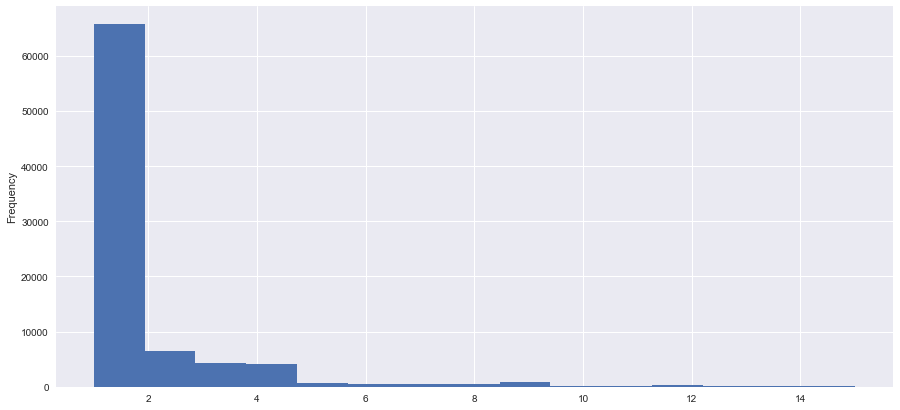

In [37]:
time_on_front_proposal_1.plot.hist(figsize=(15, 7), bins=15)

In [38]:
time_on_front_proposal_1.value_counts().sort_index()

1.00     65696
2.00      6558
3.00      4381
4.00      4043
5.00       713
6.00       467
7.00       491
8.00       446
9.00       947
10.00      205
11.00      192
12.00      387
13.00      215
14.00       88
15.00       68
dtype: int64

In [39]:
time_on_front_proposal_1.groupby(data.publisher_id).sum()

publisher_id
anotherangryvoice_blogspot_co_uk      20.00
bbc_co_uk                          14840.00
breitbart_com                       2576.00
brexitcentral_com                     45.00
buzzfeed_com                        9269.00
cnn_com                            11015.00
dailymail_co_uk                    12847.00
economist_com                        196.00
evolvepolitics_com                    37.00
foxnews_com                         6244.00
ft_com                              2475.00
huffingtonpost_com                  7800.00
independent_co_uk                   4067.00
indy100_com                          499.00
lemonde_fr                          3639.00
libdemvoice_org                      142.00
mirror_co_uk                        9036.00
nbcnews_com                         1715.00
newstatesman_com                     358.00
npr_org                             2406.00
nytimes_com                         9063.00
order-order_com                      170.00
propublica_org     

That looks good to me.

In [40]:
data["front_score"] = np.ceil(data.mins_on_front.clip_upper(1440) / (data.alexa_rank * data.num_articles_on_front) * (2.45) * 15).fillna(0)

In [41]:
data.front_score 

id
ddd1ccb2bc026b5b44204e5f4f08de1d75d4280a   1.00
d8409c3f40ce732ab4917e88f3991fba6e34052c   1.00
8ec1e46d261cde4b7eb7818481e02a439a344966   1.00
a0b6c78af7ce197a41eb7f2e8514929e40cf0f01   1.00
d6b3d8608c147417d6f83042303ad18d48df5069   1.00
617651116dbfa17ce3192113309e3fc36c653bb7   1.00
895b257635c005e56f8c33804d1e1b15adafa4ac   1.00
aaf6aea336edb397ab00ba5b07afa76a7b5a62f0   1.00
8669975be98765a81a7c563c33cc8477778b2d96   1.00
d1689b6457ebc3c471a836aa2e1638e54635f09d   1.00
7864cbd80daceedb03462a2e8acc99af0af843eb   1.00
a0000c6cbabd41b73833f2e03d737a65f0310192   1.00
46cf09d0abaebe8e43560dd298a324bbf3061925   1.00
b68f6aea1926d28ad82dd59c88f6afb048ad50c3   1.00
0459ed970d4bf508bfe956f838175ca95a26e63d   1.00
7a32f7ef1be604c817442af980c9caea6c554728   1.00
6c5f507bcf7468a5958705907bc57bfcf07189ff   1.00
a19c0121b70fa21942d150f3df8ae94414e9a929   1.00
a4aac0567b150accb92fce3b239d99428e63964d   1.00
7feb3b9ca2006c3ba3ed1b500785a828efd661e3   1.00
f4847375127b100848f654f00665aa39471b4

## Facebook brand page promotion (15 points)

One way a publisher has of promoting content is to post to their brand page. The significance of doing so is stronger when the brand page has more followers (likes).

$$ facebookPromotionProposed1_a = 15 \left( \frac {brandPageLikes_a} {\max(brandPageLikes)} \right) $$

Now lets explore the data to see if that makes sense. **tr;dr the formula above is incorrect**

In [42]:
data.fb_brand_page_likes.max()

45331565.0

In [43]:
facebook_promotion_proposed_1 = np.ceil((15 * (data.fb_brand_page_likes / data.fb_brand_page_likes.max())).fillna(0))

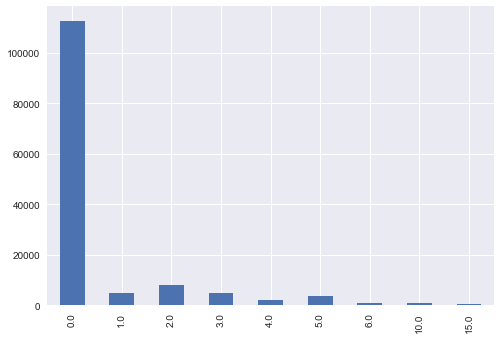

In [44]:
facebook_promotion_proposed_1.value_counts().sort_index().plot.bar()

In [45]:
facebook_promotion_proposed_1.groupby(data.publisher_id).describe()

,count,mean,std,min,25%,50%,75%,max
publisher_id,,,,,,,,
anotherangryvoice_blogspot_co_uk,20.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
bbc_co_uk,10821.00,0.63,3.00,0.00,0.00,0.00,0.00,15.00
breitbart_com,2640.00,0.85,0.99,0.00,0.00,0.00,2.00,2.00
brexitcentral_com,45.00,0.91,0.29,0.00,1.00,1.00,1.00,1.00
buzzfeed_com,1182.00,0.54,0.50,0.00,0.00,1.00,1.00,1.00
cnn_com,3085.00,3.07,4.61,0.00,0.00,0.00,10.00,10.00
dailymail_co_uk,22066.00,0.61,1.64,0.00,0.00,0.00,0.00,5.00
economist_com,340.00,2.44,1.17,0.00,3.00,3.00,3.00,3.00
evolvepolitics_com,39.00,0.95,0.22,0.00,1.00,1.00,1.00,1.00


That's too much variation: sites like the Guardian, which have a respectable 7.5m likes, should not be scoring a 3. Lets try applying a log to it, and then standard feature scaling again.

In [46]:
data.fb_brand_page_likes.groupby(data.publisher_id).max()

publisher_id
anotherangryvoice_blogspot_co_uk     330509.00
bbc_co_uk                          45331565.00
breitbart_com                       3770975.00
brexitcentral_com                     13487.00
buzzfeed_com                        2826049.00
cnn_com                            29374374.00
dailymail_co_uk                    13812505.00
economist_com                       8415152.00
evolvepolitics_com                   119272.00
foxnews_com                        16099176.00
ft_com                              3724840.00
huffingtonpost_com                  9829303.00
independent_co_uk                   7950318.00
indy100_com                          233256.00
lemonde_fr                          3976365.00
libdemvoice_org                        8618.00
mirror_co_uk                        2945691.00
nbcnews_com                         9469485.00
newstatesman_com                     154787.00
npr_org                             6264453.00
nytimes_com                        15161266.00


In [47]:
np.log(2149)

7.6727578966425103

In [48]:
np.log(data.fb_brand_page_likes.groupby(data.publisher_id).max())

publisher_id
anotherangryvoice_blogspot_co_uk   12.71
bbc_co_uk                          17.63
breitbart_com                      15.14
brexitcentral_com                   9.51
buzzfeed_com                       14.85
cnn_com                            17.20
dailymail_co_uk                    16.44
economist_com                      15.95
evolvepolitics_com                 11.69
foxnews_com                        16.59
ft_com                             15.13
huffingtonpost_com                 16.10
independent_co_uk                  15.89
indy100_com                        12.36
lemonde_fr                         15.20
libdemvoice_org                     9.06
mirror_co_uk                       14.90
nbcnews_com                        16.06
newstatesman_com                   11.95
npr_org                            15.65
nytimes_com                        16.53
order-order_com                    10.72
propublica_org                     12.84
reuters_com                        15.19
rt_

That's more like it, but the lower numbers should be smaller.

In [49]:
np.log(data.fb_brand_page_likes.groupby(data.publisher_id).max() / 1000)

publisher_id
anotherangryvoice_blogspot_co_uk    5.80
bbc_co_uk                          10.72
breitbart_com                       8.24
brexitcentral_com                   2.60
buzzfeed_com                        7.95
cnn_com                            10.29
dailymail_co_uk                     9.53
economist_com                       9.04
evolvepolitics_com                  4.78
foxnews_com                         9.69
ft_com                              8.22
huffingtonpost_com                  9.19
independent_co_uk                   8.98
indy100_com                         5.45
lemonde_fr                          8.29
libdemvoice_org                     2.15
mirror_co_uk                        7.99
nbcnews_com                         9.16
newstatesman_com                    5.04
npr_org                             8.74
nytimes_com                         9.63
order-order_com                     3.81
propublica_org                      5.93
reuters_com                         8.28
rt_

In [50]:
scaled_fb_brand_page_likes = (data.fb_brand_page_likes / 1000)
facebook_promotion_proposed_2 = np.ceil(\
    (15 * \
     (np.log(scaled_fb_brand_page_likes) / np.log(scaled_fb_brand_page_likes.max()))\
    )\
                                       ).fillna(0)

In [51]:
facebook_promotion_proposed_2.groupby(data.publisher_id).max()

publisher_id
anotherangryvoice_blogspot_co_uk    9.00
bbc_co_uk                          15.00
breitbart_com                      12.00
brexitcentral_com                   4.00
buzzfeed_com                       12.00
cnn_com                            15.00
dailymail_co_uk                    14.00
economist_com                      13.00
evolvepolitics_com                  7.00
foxnews_com                        14.00
ft_com                             12.00
huffingtonpost_com                 13.00
independent_co_uk                  13.00
indy100_com                         8.00
lemonde_fr                         12.00
libdemvoice_org                     4.00
mirror_co_uk                       12.00
nbcnews_com                        13.00
newstatesman_com                    8.00
npr_org                            13.00
nytimes_com                        14.00
order-order_com                     6.00
propublica_org                      9.00
reuters_com                        12.00
rt_

LGTM. So the equation is


$$ facebookPromotion_a = 15 \left( 
\frac {\log(\frac {brandPageLikes_a}{1000})} 
{\log(\frac {\max(brandPageLikes)}{1000}))} \right) $$


Now, let's try applying standard feature scaling approch to this, rather than using a magic number of 1,000. That equation would be:

\begin{align}
unscaledFacebookPromotion_a &= 
   \log(brandPageLikes_a) \\
facebookPromotion_a &= 
   15 \cdot \frac{unscaledFacebookPromotion_a - \min(unscaledFacebookPromotion)}{\max(unscaledFacebookPromotion) - \min(unscaledFacebookPromotion)}  \\
\\
\text{The scaling can be simplified to:} \\
facebookPromotion_a &= 
   15 \cdot \frac{unscaledFacebookPromotion_a - \log(\min(brandPageLikes))}{\log(\max(brandPageLikes)) - \log(\min(brandPageLikes))}  \\
\\
\text{Meaning the overall equation becomes:} \\
facebookPromotion_a &= 
   15 \cdot \frac{\log(brandPageLikes_a) - \log(\min(brandPageLikes))}{\log(\max(brandPageLikes)) - \log(\min(brandPageLikes))} 
   \end{align}


In [52]:
facebook_promotion_proposed_3 = np.ceil(
    (14 * 
     ( 
         (np.log(data.fb_brand_page_likes) - np.log(data.fb_brand_page_likes.min()) ) /
         (np.log(data.fb_brand_page_likes.max()) - np.log(data.fb_brand_page_likes.min()))
     )
    ) + 1
                                       )

In [53]:
facebook_promotion_proposed_3.groupby(data.publisher_id).max()

publisher_id
anotherangryvoice_blogspot_co_uk    8.00
bbc_co_uk                          15.00
breitbart_com                      12.00
brexitcentral_com                   3.00
buzzfeed_com                       11.00
cnn_com                            15.00
dailymail_co_uk                    14.00
economist_com                      13.00
evolvepolitics_com                  6.00
foxnews_com                        14.00
ft_com                             12.00
huffingtonpost_com                 13.00
independent_co_uk                  13.00
indy100_com                         7.00
lemonde_fr                         12.00
libdemvoice_org                     2.00
mirror_co_uk                       11.00
nbcnews_com                        13.00
newstatesman_com                    7.00
npr_org                            12.00
nytimes_com                        14.00
order-order_com                     5.00
propublica_org                      8.00
reuters_com                        12.00
rt_

In [54]:
data["facebook_promotion_score"] = facebook_promotion_proposed_3.fillna(0.0)

# Review

In [55]:
data["promotion_score"] = (data.lead_score + data.front_score + data.facebook_promotion_score)
data["attention_index"] = (data.promotion_score + data.response_score)

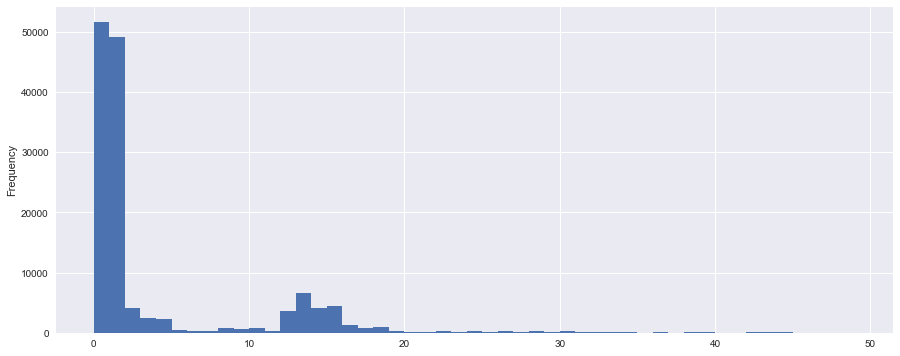

In [56]:
data.promotion_score.plot.hist(bins=np.arange(50), figsize=(15,6))

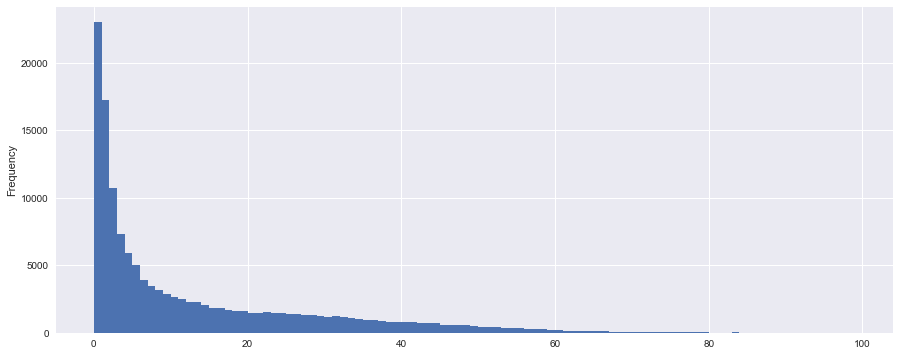

In [57]:
data.attention_index.plot.hist(bins=np.arange(100), figsize=(15,6))

In [58]:
data.attention_index.value_counts().sort_index()

0.00     23004
1.00     17206
2.00     10703
3.00      7293
4.00      5918
5.00      4993
6.00      3946
7.00      3437
8.00      3179
9.00      2891
10.00     2645
11.00     2521
12.00     2284
13.00     2285
14.00     2069
15.00     1863
16.00     1822
17.00     1696
18.00     1614
19.00     1579
20.00     1460
21.00     1503
22.00     1509
23.00     1468
24.00     1450
25.00     1404
26.00     1391
27.00     1324
28.00     1325
29.00     1252
         ...  
65.00      154
66.00      132
67.00       78
68.00       81
69.00       82
70.00       65
71.00       42
72.00       46
73.00       53
74.00       44
75.00       27
76.00       48
77.00       39
78.00       32
79.00       38
80.00       19
81.00       16
82.00       20
83.00       28
84.00       13
85.00       17
86.00        9
87.00       12
88.00       20
89.00       12
90.00        3
91.00        4
92.00        4
93.00        2
94.00        6
Name: attention_index, Length: 95, dtype: int64

In [59]:
# and lets see the articles with the biggest attention index
data.sort_values("attention_index", ascending=False)

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,...,fb_brand_page_likes,fb_brand_page_time,alexa_rank,word_count,response_score,lead_score,front_score,facebook_promotion_score,promotion_score,attention_index
id,,,,,,,,,,,,,,,,,,,,,
63152b4a2aa41e82016aa771891fdf1333128985,http://www.cnn.com/2017/12/05/politics/jeff-fl...,GOP Sen. Jeff Flake writes check to Democrat o...,2017-12-05 22:07:18.152,2017-12-05 22:01:48.000,115293,563.96,2017-12-05T22:49:09.264Z,13890,93202,8201,...,29256092.00,2017-12-05T22:30:17.000Z,105,173.00,50.00,20.00,9.00,15.00,44.00,94.00
6654a151fcbef618eb610580d5448ad83303b5a8,http://www.cnn.com/2017/12/16/health/cdc-banne...,"Word ban at CDC includes 'vulnerable,' 'fetus,...",2017-12-16 16:04:22.124,2017-12-16 16:01:09.000,339451,3406.06,2017-12-16T22:04:03.814Z,94158,201048,44245,...,29319882.00,2017-12-16T16:40:20.000Z,105,447.00,50.00,20.00,9.00,15.00,44.00,94.00
33d3d70eb4c8c44c81f87f7cfc62a61e8f051150,http://www.cnn.com/2017/12/01/politics/senate-...,Uncertainty looms over Senate's tax bill,2017-12-01 06:16:20.820,2017-12-01 06:11:21.000,76401,121.19,2017-12-02T17:18:08.986Z,24222,43912,8267,...,29233578.00,2017-12-02T07:34:25.000Z,105,962.00,50.00,20.00,9.00,15.00,44.00,94.00
abe03a536d43790cd2c89fbeb8d3f3953376454d,http://www.cnn.com/2017/12/15/politics/judicia...,Trump judicial nominee struggles to answer bas...,2017-12-15 14:07:14.292,2017-12-15 14:02:30.000,108798,157.13,2017-12-16T02:46:13.544Z,36967,56279,15552,...,29318332.00,2017-12-16T02:29:02.000Z,105,327.00,50.00,20.00,9.00,15.00,44.00,94.00
46d8c8a0e17496bd7af92576c33efb6c80327f22,http://www.cnn.com/2017/12/06/us/ventura-fire-...,Ventura fire: Southern California grapples wit...,2017-12-06 08:55:34.234,2017-12-06 08:53:45.000,76140,73.96,2017-12-07T01:03:07.285Z,18241,48944,8955,...,29259398.00,2017-12-06T11:00:22.000Z,105,810.00,50.00,20.00,9.00,15.00,44.00,94.00
49974d79caf78028259583d5b24b6a272c81ba16,http://www.bbc.co.uk/news/world-middle-east-42...,Jerusalem: UN resolution rejects Trump's decla...,2017-12-21 17:25:06.643,2017-12-21 17:21:33.000,104052,1024.29,2017-12-21T18:18:13.675Z,14367,82849,6836,...,45205436.00,2017-12-21T17:51:41.000Z,96,119.00,50.00,20.00,9.00,15.00,44.00,94.00
d479366e1dab01635b8321713b5122e26d0e1e43,http://www.cnn.com/2017/12/10/politics/kfile-r...,Roy Moore in 2011: Getting rid of amendments a...,2017-12-10 23:10:12.827,2017-12-10 23:06:56.000,97289,156.92,2017-12-11T04:44:07.308Z,23777,56347,17165,...,29294730.00,2017-12-10T23:30:04.000Z,105,1243.00,50.00,20.00,8.00,15.00,43.00,93.00
b23787d954cd054eafa4e6bf352d71dfb793df17,http://www.cnn.com/2017/12/05/us/ventura-count...,"1 dead, hundreds evacuate in fast-moving South...",2017-12-05 07:13:18.431,2017-12-05 07:06:21.000,86026,79.91,2017-12-05T14:14:04.504Z,25060,51634,9332,...,29253039.00,2017-12-05T14:00:14.000Z,105,196.00,50.00,20.00,8.00,15.00,43.00,93.00
4fbd6316c740d293ad9c2adb45c8b3e73a2225ea,http://www.bbc.co.uk/news/business-42353545,Walt Disney buys Murdoch's Fox for $52bn,2017-12-14 12:10:24.949,2017-12-14 12:08:08.000,40757,214.01,2017-12-14T12:31:24.627Z,8386,26851,5520,...,45140390.00,2017-12-14T12:20:08.000Z,96,64.00,46.00,20.00,11.00,15.00,46.00,92.00


In [60]:
data["score_diff"] = data.promotion_score - data.response_score

In [61]:
# promoted but low response
data.sort_values("score_diff", ascending=False).head(25)

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,...,fb_brand_page_time,alexa_rank,word_count,response_score,lead_score,front_score,facebook_promotion_score,promotion_score,attention_index,score_diff
id,,,,,,,,,,,,,,,,,,,,,
60dde39afccfcabaf8cf2a8ed28a3d507020545b,https://www.buzzfeed.com/kateaurthur/2018-tv-a...,Everything You Need To Know About TV And Movie...,2017-12-30 17:04:21.638,2017-12-21 22:23:16,1,0.09,2017-12-30T17:16:03.579Z,0,0,1,...,2017-12-30T20:22:25.000Z,147,nan,0.00,19.00,15.00,11.00,45.00,45.00,45.00
2f11fdaca32431287b0f6fba6e02e024cbbec99d,https://www.buzzfeed.com/jtes/for-women-lookin...,"For Women Looking For Jobs After Prison, It Do...",2017-12-07 13:01:23.490,2017-12-05 19:01:09,1,0.09,2017-12-07T13:13:14.909Z,0,0,1,...,2017-12-10T02:00:00.000Z,147,3739.00,0.00,19.00,14.00,11.00,44.00,44.00,44.00
8705fb3da20761c6674f087884089ba3068e63fa,https://www.buzzfeed.com/nidhisubbaraman/nativ...,Native Americans Were Anxious About Trump Head...,2017-12-27 16:04:15.611,2017-12-20 17:50:41,4,0.39,2017-12-27T16:15:16.931Z,0,0,4,...,2017-12-27T16:19:01.000Z,147,1380.00,1.00,19.00,15.00,11.00,45.00,46.00,44.00
32034e45b629a27a33e035a77757e67a27c59d71,https://www.buzzfeed.com/stephaniemlee/here-ar...,Here Are 13 Tech Startups And Products That Fl...,2017-12-27 18:13:24.230,2017-12-21 23:52:53,4,0.36,2017-12-27T18:25:11.821Z,0,0,4,...,2017-12-28T02:12:57.000Z,147,1260.00,1.00,19.00,15.00,11.00,45.00,46.00,44.00
eb5b52c981dd04408660f23967ba814262156a5f,https://www.buzzfeed.com/charliewarzel/youtube...,YouTubers Made Hundreds Of Thousands Off Of Bi...,2017-12-11 15:46:21.876,2017-12-08 22:35:56,0,0.00,2017-12-11T15:57:19.321Z,0,0,0,...,2017-12-11T16:05:29.000Z,147,1916.00,0.00,19.00,14.00,11.00,44.00,44.00,44.00
24f5ef2ea5bb64cc3a2def2b55092a2ce5751de8,https://www.buzzfeed.com/rosalindadams/how-a-g...,How a Giant Psychiatric Hospital Company Tried...,2017-12-27 16:40:28.231,2017-12-22 23:17:31,6,0.46,2017-12-27T16:52:08.743Z,0,0,6,...,2017-12-27T17:13:02.000Z,147,1831.00,2.00,19.00,15.00,11.00,45.00,47.00,43.00
a2c6e7241dd8ffcfad898e5d44f9b00873f4f637,https://www.buzzfeed.com/monicamark/niger-secr...,Inside The Botched Raid That Left Four US Sold...,2017-12-09 15:58:19.223,2017-12-07 15:22:08,0,0.00,2017-12-09T16:10:11.079Z,0,0,0,...,2017-12-11T18:03:00.000Z,147,3392.00,0.00,19.00,13.00,11.00,43.00,43.00,43.00
851d61f0cda588c4405a4dd959b187bcca3edf3c,https://www.buzzfeed.com/melissasegura/how-to-...,How To Close Two Stubborn Murder Cases In One ...,2017-12-28 20:46:16.651,2017-12-22 22:51:14,2,0.18,2017-12-28T20:58:09.837Z,0,0,2,...,2017-12-28T21:22:08.000Z,147,4647.00,1.00,19.00,14.00,11.00,44.00,45.00,43.00
aecd5ea40f84a071b2b98deb901d374a1af82bea,https://www.buzzfeed.com/davidmack/heres-how-t...,Here's How To Find Out How The Republican Tax ...,2017-12-19 21:19:19.316,2017-12-16 15:28:34,0,0.00,2017-12-19T21:31:07.547Z,0,0,0,...,2017-12-19T23:44:50.000Z,147,nan,0.00,19.00,13.00,11.00,43.00,43.00,43.00


In [62]:
# high response but not promoted
data.sort_values("score_diff", ascending=True).head(25)

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,...,fb_brand_page_time,alexa_rank,word_count,response_score,lead_score,front_score,facebook_promotion_score,promotion_score,attention_index,score_diff
id,,,,,,,,,,,,,,,,,,,,,
6db0269552b047b879c328010314c66ddcaec6da,https://www.nytimes.com/2017/12/13/opinion/sal...,Salma Hayek: Harvey Weinstein Is My Monster Too,2017-12-13 23:49:10.353,2017-12-13 23:45:20.000,824459,5490.26,2017-12-14T03:03:13.004Z,101937,599446,123076,...,NaN,120,2800.00,50.00,0.00,0.00,0.00,0.00,50.00,-50.00
81c5b9be259fc28bcdef151800f9460767cf7690,https://www.washingtonpost.com/news/politics/w...,"In an upset, Democrat Doug Jones is projected ...",2017-12-13 03:29:13.065,2017-12-13 03:26:00.000,139737,1302.34,2017-12-13T03:40:17.040Z,19636,111733,8368,...,NaN,191,102.00,50.00,0.00,1.00,0.00,1.00,51.00,-49.00
1cd3a4c15d1b80136d4cf9bc6ef4a8e1ec03a3ad,http://yournewswire.com/nestle-ceo-water-is-no...,"Nestle CEO: Water Is Not A Human Right, Should...",2017-12-14 17:44:25.584,2017-12-14 16:30:44.000,111833,1.74,2017-12-14T20:59:13.680Z,42856,44725,24252,...,NaN,22568,135.00,50.00,0.00,1.00,0.00,1.00,51.00,-49.00
d18643b71da717ca3fbe0357ecf425b197853b16,https://www.washingtonpost.com/news/capital-we...,Alaska just reported one of the most extreme s...,2017-12-07 17:04:33.494,2017-12-07 16:57:03.000,117687,533.02,2017-12-08T18:06:11.882Z,19815,83900,13972,...,NaN,191,580.00,50.00,0.00,1.00,0.00,1.00,51.00,-49.00
87f55392a64a0600bbbb60e7a61e641dd51e75cc,http://www.foxnews.com/sports/2017/12/09/linds...,Lindsey Vonn suffers back injury in World Cup ...,2017-12-10 01:29:22.598,2017-12-10 01:28:54.000,77394,45.61,2017-12-15T08:13:17.970Z,31471,41903,4020,...,NaN,285,650.00,50.00,0.00,1.00,0.00,1.00,51.00,-49.00
74a8e4a79e8e0d97e2e803ecdb912533007bfe21,http://www.telegraph.co.uk/art/artists/lubiana...,Lubiana Himid's 2017 Turner Prize victory is a...,2017-12-05 19:34:16.136,2017-12-05 19:30:17.000,127045,2073.74,2017-12-05T22:48:10.208Z,11691,25685,89669,...,NaN,370,540.00,50.00,0.00,1.00,0.00,1.00,51.00,-49.00
8c012e0ed5e7d1facf7e68848ae595de4be07f2d,https://www.theguardian.com/business/2017/dec/...,UK banks join multinationals in pledge to come...,2017-12-12 11:55:44.686,2017-12-12 11:53:19.000,79893,76.13,2017-12-15T10:22:10.889Z,3370,68212,8311,...,NaN,142,386.00,50.00,0.00,1.00,0.00,1.00,51.00,-49.00
8804453dcfb7fc6bb6185ef0037846ad46b4290a,https://www.buzzfeed.com/michaelblackmon/profe...,People Are Thirsting Pretty Hard For James McA...,2017-12-05 20:34:16.372,2017-12-05 20:06:02.000,135627,263.18,2017-12-06T01:32:03.730Z,31320,100289,4018,...,NaN,147,nan,50.00,0.00,2.00,0.00,2.00,52.00,-48.00
1cd4d1d98c6f91e32bb2dcaba710f524bc8d8a1d,http://www.foxnews.com/entertainment/2017/12/0...,Media elite laughed at 2008 roast sending Matt...,2017-12-05 20:54:22.240,2017-12-05 20:44:23.000,75257,71.06,2017-12-09T05:31:06.998Z,14766,50287,10204,...,NaN,285,1157.00,50.00,0.00,2.00,0.00,2.00,52.00,-48.00


Write that data to a file. Note that the scores here are provisional for two reasons:
1. they should be using a rolling-month based on the article publication date to calculate medians/min/max etc, whereas in this workbook we as just using values for the month of May
2. for analysis, we've rounded the numbers; we don't expect to do that for the actual scores

In [63]:
data.to_csv("articles_with_provisional_scores_2017-10-01_2017-10-31.csv")

# Summary

The attention index of an article is comprised of four components:

- *lead score* (max 20 points) based on how long an article was the lead story on the publisher's home page, scaled by the traffic to that publisher
- *front score* (max 15 points) based on how long an article was present on the publisher's home page, scaled by traffic to that publisher
- *Facebook promotion score* (max 15 points) based on whether the article was promoted to the publisher's Facebook brand page, scaled by the reach of that brand page
- *response score* (max 50 points) based on the number of Facebook engagements the article received, relative to other articles

Or, in other words:

\begin{align}
attentionIndex_a &= leadScore_a + frontScore_a + facebookPromotionScore_a + responseScore_a \\
leadScore_a &= 20 \cdot \left(\frac{\min(minsAsLead_a, 60)}{alexaRank_a}\right) \cdot \left( \frac{\min(alexaRank)}{60} \right) \\
frontScore_a &= 
15 \cdot
\left(\frac{\min(minsOnFront_a, 1440)}{alexaRank_a \cdot numArticlesOnFront_a}\right) \cdot
\left( \frac{\min(alexaRank \cdot numArticlesOnFront)}{1440} \right) \\
facebookPromotion_a &= 
\begin{cases}
 0 \text{ if not shared on brand page }\\
   15 \cdot \frac{\log(brandPageLikes_a) - \log(\min(brandPageLikes))}{\log(\max(brandPageLikes)) - \log(\min(brandPageLikes))}  \text{ otherwise }
\end{cases}   
\\
responseScore_a &= 
\begin{cases} 
   0 \text{ if } engagements_a = 0 \\
   50 \cdot 
   \frac{\log(\min(engagements_a,limit) + median(engagements)) - \log(1 + median(engagements))}
   {\log(limit + median(engagements)) - \log(1 + median(engagements))} \text{ if } engagements_a > 0
\end{cases} \\
\end{align} 